File is to test the training data set without concatenating with the testing data set
Also to show the initial training data set and how its biased

In [12]:
#import dependencies
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, precision_recall_curve
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import log_loss
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from helper import get_stats

In [2]:
PATH = "./dataset/customer_churn_dataset-training-master.csv"

df = pd.read_csv(PATH)
df.drop(199295, inplace=True) #drops the one null column

In [3]:
#Check for null values
nan_count = np.sum(df.isnull(), axis=0)
nan_count

CustomerID           0
Age                  0
Gender               0
Tenure               0
Usage Frequency      0
Support Calls        0
Payment Delay        0
Subscription Type    0
Contract Length      0
Total Spend          0
Last Interaction     0
Churn                0
dtype: int64

In [4]:
df.drop(columns=["CustomerID", "Gender"], inplace=True)

In [5]:
df_subscription_type = pd.get_dummies(df['Subscription Type'], prefix='Subscription Type')
df = df.join(df_subscription_type)
df.drop(columns='Subscription Type', inplace=True)

df_contract_length = pd.get_dummies(df['Contract Length'], prefix='Contract Length')
df = df.join(df_contract_length)
df.drop(columns='Contract Length', inplace=True)

In [6]:
corr_matrix = round(df.corr(),5)
corrs = corr_matrix['Churn']
corrs_sorted = corrs.sort_values(ascending=False)
corrs_sorted


Churn                         1.00000
Support Calls                 0.57427
Contract Length_Monthly       0.43355
Payment Delay                 0.31213
Age                           0.21839
Last Interaction              0.14962
Subscription Type_Basic       0.02053
Subscription Type_Standard   -0.00925
Subscription Type_Premium    -0.01107
Usage Frequency              -0.04610
Tenure                       -0.05192
Contract Length_Annual       -0.17596
Contract Length_Quarterly    -0.17624
Total Spend                  -0.42935
Name: Churn, dtype: float64

In [7]:
#grabs any random sample above age 50 to show that they always churn when age is above 50
df[df['Age']>50].sample(n=10)

,Age,Tenure,Usage Frequency,Support Calls,Payment Delay,Total Spend,Last Interaction,Churn,Subscription Type_Basic,Subscription Type_Premium,Subscription Type_Standard,Contract Length_Annual,Contract Length_Monthly,Contract Length_Quarterly
143413,62.0,12.0,14.0,0.0,8.0,512.00,11.0,1.0,True,False,False,True,False,False
65334,51.0,8.0,21.0,9.0,6.0,403.00,17.0,1.0,True,False,False,False,False,True
44236,54.0,27.0,1.0,10.0,20.0,942.00,26.0,1.0,True,False,False,False,False,True
162778,62.0,35.0,20.0,0.0,22.0,272.00,19.0,1.0,True,False,False,False,False,True
127254,63.0,28.0,13.0,4.0,16.0,922.00,26.0,1.0,True,False,False,True,False,False
247773,63.0,31.0,9.0,8.0,6.0,773.67,28.0,1.0,False,False,True,True,False,False
235355,57.0,46.0,26.0,10.0,16.0,968.67,2.0,1.0,True,False,False,False,False,True
78694,53.0,46.0,22.0,10.0,21.0,273.00,8.0,1.0,True,False,False,False,True,False
106070,60.0,33.0,21.0,7.0,9.0,981.00,5.0,1.0,True,False,False,True,False,False
248022,65.0,4.0,19.0,2.0,24.0,143.49,13.0,1.0,True,False,False,False,True,False


<Axes: xlabel='Age', ylabel='Churn'>

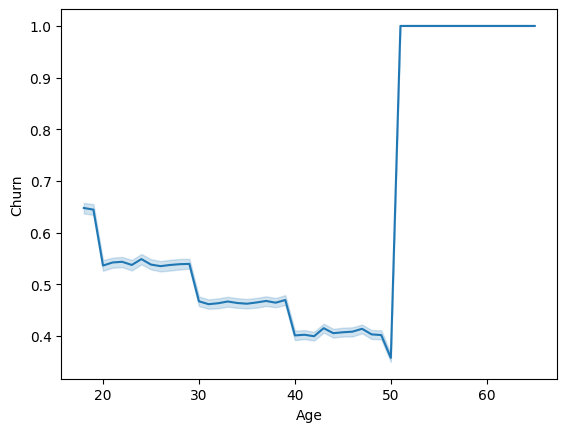

In [8]:
sns.lineplot(x=df['Age'], y=df['Churn'])


In [9]:
y = df['Churn']
X = df.drop(columns='Churn')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=1234)

In [ ]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)
predictions = model.predict(X_test)
probabilities = model.predict_proba(X_test)
lg_loss = log_loss(y_test, probabilities)
acc_score = accuracy_score(y_test, predictions)
precision = precision_score(y_test, predictions)
recall = recall_score(y_test, predictions)
# print('Log loss=' + str(lg_loss) + ', accuracy score: ' + str(acc_score), ', recall : ' + recall)
print(f'Log Loss: {lg_loss}, accuracy score: {acc_score}, precision: {precision}, recall: {recall}')
print('F1 Score: ' + str((2*precision*recall)/(precision+recall)))


Log Loss: 0.25695506802774937, accuracy score: 0.8895727788279774, precision: 0.920881971465629, recall: 0.8808580461840156
F1 Score: 0.9004254622811324


In [13]:
from sklearn.tree import DecisionTreeClassifier
y = df['Churn']
X = df.drop(columns='Churn')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4,stratify=y,random_state=1234)

dt = DecisionTreeClassifier(criterion='log_loss', max_depth=7, min_samples_leaf=4, random_state=1234)
dt.fit(X_train, y_train)

y_pred = dt.predict(X_test)
probabilities = dt.predict_proba(X_test)

get_stats(y_test, y_pred, probabilities)



Log Loss: 0.07653992185159593, accuracy score: 0.9781379548921643, precision: 0.9999895992594673, recall: 0.96146
F1 Score: 0.9803463728734061


In [15]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [3, 5, 7],  # Testing different tree depths
    'min_samples_leaf': [2, 4]  # Minimum samples required at leaf nodes
}

# Perform Grid Search with 5-fold cross-validation
grid_search = GridSearchCV(estimator=dt, param_grid=param_grid, cv=5, scoring='accuracy')

# Train the model using grid search
grid_search.fit(X_train, y_train)

# Get the best hyperparameters and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

print(f'{best_params}, {best_model}')

{'max_depth': 7, 'min_samples_leaf': 4}, DecisionTreeClassifier(criterion='log_loss', max_depth=7, min_samples_leaf=4,
                       random_state=1234)


In [16]:
#Intial HGBC with all default parameters
from sklearn.ensemble import HistGradientBoostingClassifier

y = df['Churn']
X = df.drop(columns='Churn')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4,stratify=y,random_state=1234)

hgbc = HistGradientBoostingClassifier()
hgbc.fit(X_train, y_train)

y_pred = hgbc.predict(X_test)
probabilities = hgbc.predict_proba(X_test)

get_stats(y_test, y_pred, probabilities)

Log Loss: 0.034063108299301696, accuracy score: 0.9910907203983372, precision: 0.9997867392430259, recall: 0.9845
F1 Score: 0.9920844858946647


These models are susceptible to overfitting as shown from high accuracy.
